# Exercise - Decision Tree

- Use the credit default dataset and build a decision tree model and a random forest model for predicting "default" outcome based on the others. 
- What is the Gini score at the root?
- Tune the decision tree model to find the combination of max depth and the criterion that maximize the accuracy score.
- As per decision tree model, which are most important features? 
- Tune the random forest model to find the max depth, n_estimators, min_samples_leaf, and criterion that maximize the recall score.




In [1]:
def gini(n1, n2):
    n = n1 + n2
    return 2 * n1 * n2 / (n**2)
    

In [2]:
gini(486, 214)

0.4245061224489796

In [3]:
def info_gain(g, g1, n1, g2, n2):
    return g - (g1*n1 + g2*n2)/(n1+n2)

In [4]:
info_gain(.425, .488, 424, .221, 276)

0.04227428571428571

In [5]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_csv("/data/credit-default.csv")

df_train, df_test = model_selection.train_test_split(df, test_size = 0.3, random_state = 1234)

df_train.shape

(700, 21)

In [9]:
df_train.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
96,unknown,12,critical,education,2012,unknown,4 - 7 yrs,4,female,none,...,other,61,none,own,1,1,1,none,yes,skilled employee
792,unknown,6,critical,furniture,1221,unknown,1 - 4 yrs,1,married male,none,...,building society savings,27,none,own,2,1,1,none,yes,skilled employee
218,< 0 DM,24,repaid,furniture,3021,< 100 DM,1 - 4 yrs,2,divorced male,none,...,real estate,24,none,rent,1,1,1,none,yes,unskilled resident
967,unknown,15,repaid,radio/tv,3568,< 100 DM,> 7 yrs,4,female,none,...,other,54,bank,rent,1,1,1,yes,yes,mangement self-employed
170,< 0 DM,15,fully repaid,car (new),950,< 100 DM,> 7 yrs,4,single male,none,...,other,33,none,rent,2,2,2,none,yes,skilled employee


In [10]:
df1 = df_train[df_train.months_loan_duration>24]
df2 = df_train[df_train.months_loan_duration<=24]

In [11]:
df1.default.value_counts()

1    87
2    64
Name: default, dtype: int64

In [12]:
df2.default.value_counts()

1    407
2    142
Name: default, dtype: int64

In [13]:
g1 = gini(87, 64)

In [14]:
g2 = gini(407, 142)

In [15]:
n1 = len(df1)

In [17]:
n2 = len(df2)

In [18]:
info_gain(0.424, g1, n1, g2, n2)

0.017869786469938476

In [19]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


training accuracy: 0.74
test accuracy: 0.6633333333333333
training precison: 0.7142857142857143
test precision: 0.3793103448275862
training recall: 0.1941747572815534
test recall: 0.11702127659574468


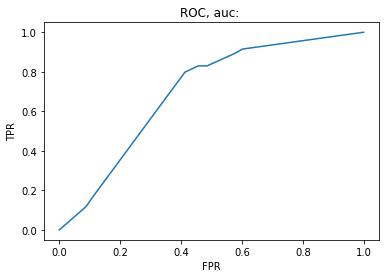

In [36]:
target = "default"
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1234)


pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est",tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 5))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("training precison:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("training recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))

y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc: " % auc)
plt.xlabel("FPR")
plt.ylabel("TPR");


In [37]:
est = pipe.steps[-1][-1]
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png


In [42]:
summary = pd.DataFrame({"feature": X.columns, "importance": est.feature_importances_})
summary.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.521257
1,amount,0.210642
0,months_loan_duration,0.114223
39,installment_plan_none,0.072366
36,property_other,0.048113
35,other_debtors_none,0.033399
34,other_debtors_guarantor,0.000000
26,savings_balance_unknown,0.000000
27,employment_length_1 - 4 yrs,0.000000
28,employment_length_4 - 7 yrs,0.000000


training accuracy: 0.76
test accuracy: 0.6966666666666667
training precison: 0.7878787878787878
test precision: 0.5555555555555556
training recall: 0.2524271844660194
test recall: 0.1595744680851064


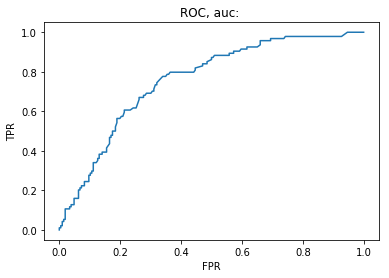

In [43]:
target = "default"
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1234)


pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est",ensemble.RandomForestClassifier(n_estimators=20,max_features=0.6
                                    , max_depth = 3, min_samples_split = 5))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("training precison:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("training recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))

y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc: " % auc)
plt.xlabel("FPR")
plt.ylabel("TPR");


In [44]:
est = pipe.steps[-1][-1]
summary = pd.DataFrame({"feature": X.columns, "importance": est.feature_importances_})
summary.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.357723
1,amount,0.193479
0,months_loan_duration,0.093956
7,checking_balance_< 0 DM,0.064654
4,age,0.045040
39,installment_plan_none,0.030630
11,credit_history_fully repaid,0.025688
14,purpose_car (new),0.024687
12,credit_history_fully repaid this bank,0.023661
41,housing_own,0.022352
